In [18]:
import pandas as pd

from _config import FILE_PROCESSED_DTU_SOLAR_STATION
import seaborn as sns

import matplotlib.pyplot as plt


In [14]:
# Load the pickle file to verify the content
df = pd.read_pickle(FILE_PROCESSED_DTU_SOLAR_STATION)
df.head()

,DNI,DHI,wind_speed_avg,wind_dir_avg,air_temperature,air_pressure,relative_humidity,rain_intensity,solar_altitude
Time(utc),,,,,,,,,
2020-01-01 07:43:00,0.0,0.003996,0.170213,0.746518,0.331707,0.728395,0.812417,0.0,0.000959
2020-01-01 07:44:00,0.0,0.004429,0.212766,0.746518,0.331707,0.728395,0.815059,0.0,0.002430
2020-01-01 07:45:00,0.0,0.005271,0.191489,0.768802,0.331707,0.728395,0.815059,0.0,0.003909
2020-01-01 07:46:00,0.0,0.006150,0.170213,0.766017,0.331707,0.728395,0.815059,0.0,0.005394
2020-01-01 07:47:00,0.0,0.006449,0.250000,0.785515,0.331707,0.728395,0.816380,0.0,0.006885


In [44]:
df.columns

Index(['DNI', 'DHI', 'wind_speed_avg', 'wind_dir_avg', 'air_temperature',
       'air_pressure', 'relative_humidity', 'rain_intensity',
       'solar_altitude'],
      dtype='object')

In [15]:
display(df.describe().round(3), df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1301427 entries, 2020-01-01 07:43:00 to 2025-01-01 08:04:00
Data columns (total 9 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   DNI                1301427 non-null  float64
 1   DHI                1301427 non-null  float64
 2   wind_speed_avg     1301427 non-null  float64
 3   wind_dir_avg       1301427 non-null  float64
 4   air_temperature    1301427 non-null  float64
 5   air_pressure       1301427 non-null  float64
 6   relative_humidity  1301427 non-null  float64
 7   rain_intensity     1301427 non-null  float64
 8   solar_altitude     1301427 non-null  float64
dtypes: float64(9)
memory usage: 99.3 MB


,DNI,DHI,wind_speed_avg,wind_dir_avg,air_temperature,air_pressure,relative_humidity,rain_intensity,solar_altitude
count,1301427.000,1301427.000,1301427.000,1301427.000,1301427.000,1301427.000,1301427.000,1301427.000,1301427.000
mean,0.250,0.130,0.148,0.570,0.531,0.552,0.666,0.001,0.404
std,0.329,0.118,0.092,0.257,0.159,0.126,0.207,0.008,0.276
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.043,0.080,0.334,0.400,0.481,0.509,0.000,0.173
50%,0.010,0.094,0.133,0.652,0.541,0.556,0.691,0.000,0.354
75%,0.551,0.184,0.197,0.777,0.654,0.630,0.844,0.000,0.618
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


None

In [17]:

# # Create a boolean DataFrame indicating where values are missing
# missing_data = df.isnull()
#
# # Plot the heatmap
# plt.figure(figsize=(15, 10))
# sns.heatmap(missing_data, cbar=False, cmap='viridis')
# plt.title('Missing Data in Time Series')
# plt.xlabel('Attributes')
# plt.ylabel('Time')
# plt.show()

<Figure size 1500x1000 with 0 Axes>

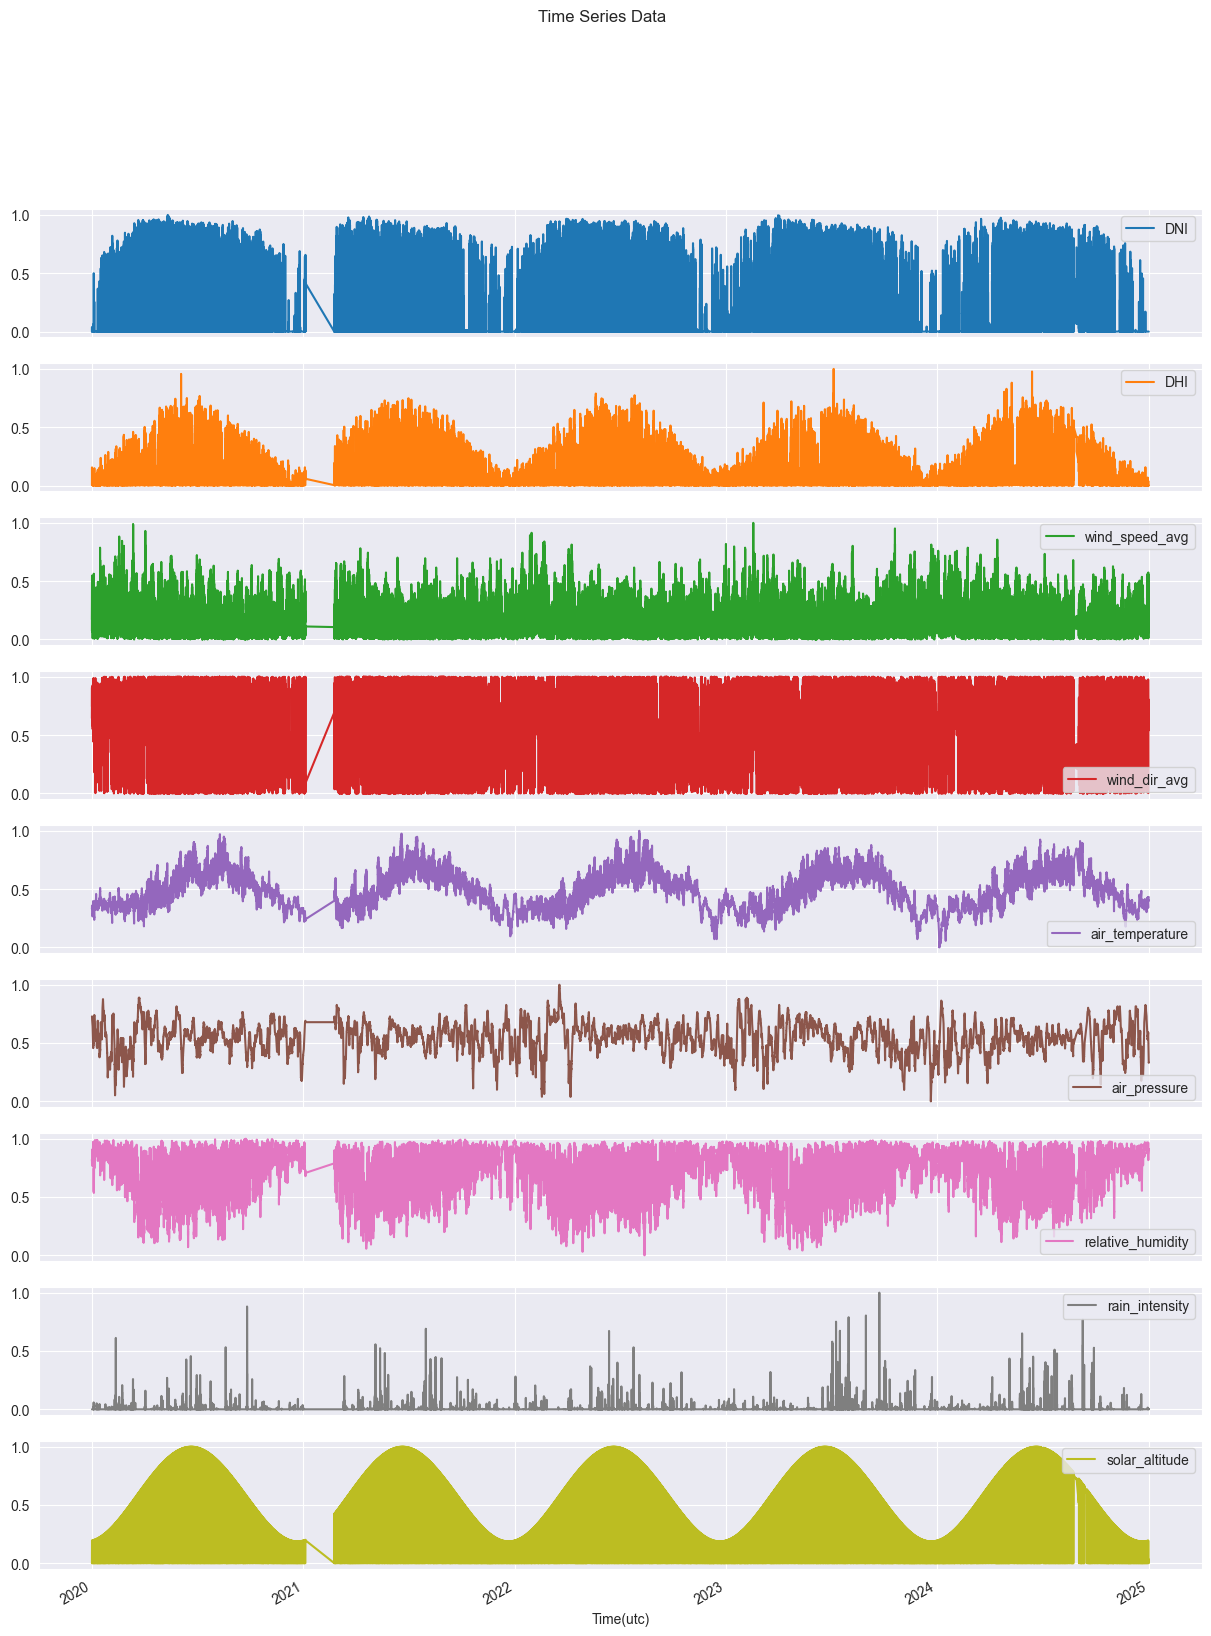

In [19]:
# Plotting the time series data
plt.figure(figsize=(15, 10), layout='constrained')
df.plot(subplots=True, figsize=(15, 20), title='Time Series Data')
plt.show()

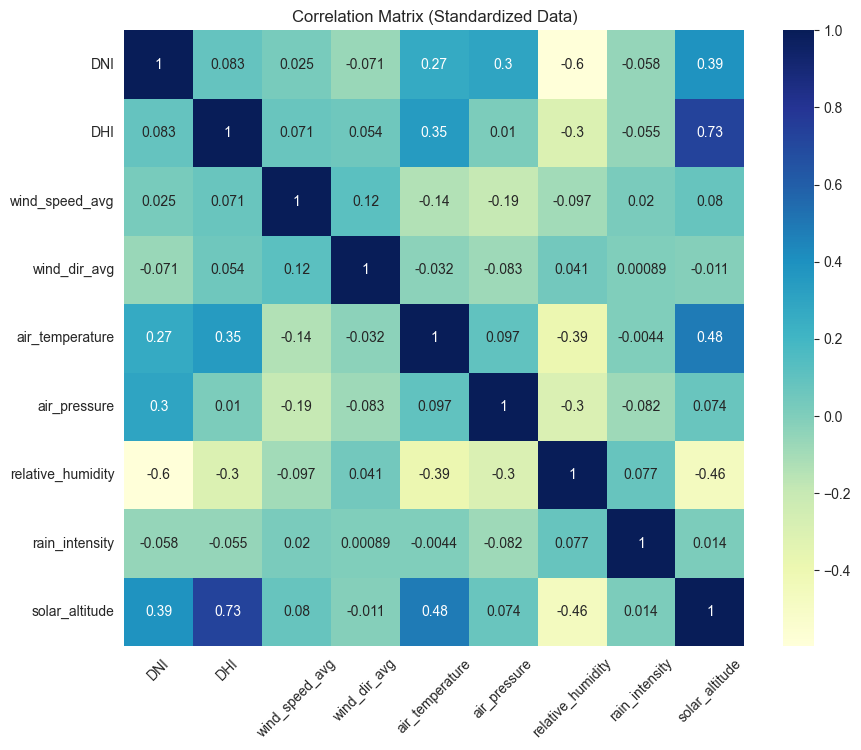

In [20]:
corr_std = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_std, annot=True, cmap='YlGnBu')
plt.title("Correlation Matrix (Standardized Data)")
plt.xticks(rotation=45)
plt.show()

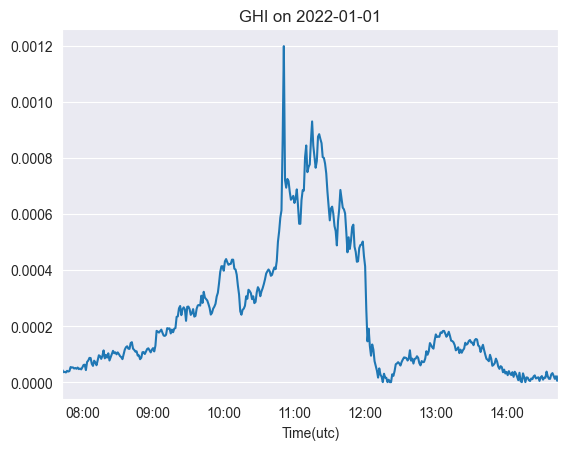

In [22]:
# select random date and plot the GHI
date = '2022-01-01'
df.loc[date, 'DNI'].plot()
plt.title(f'GHI on {date}')
plt.show()


datetime.date(2020, 4, 7)

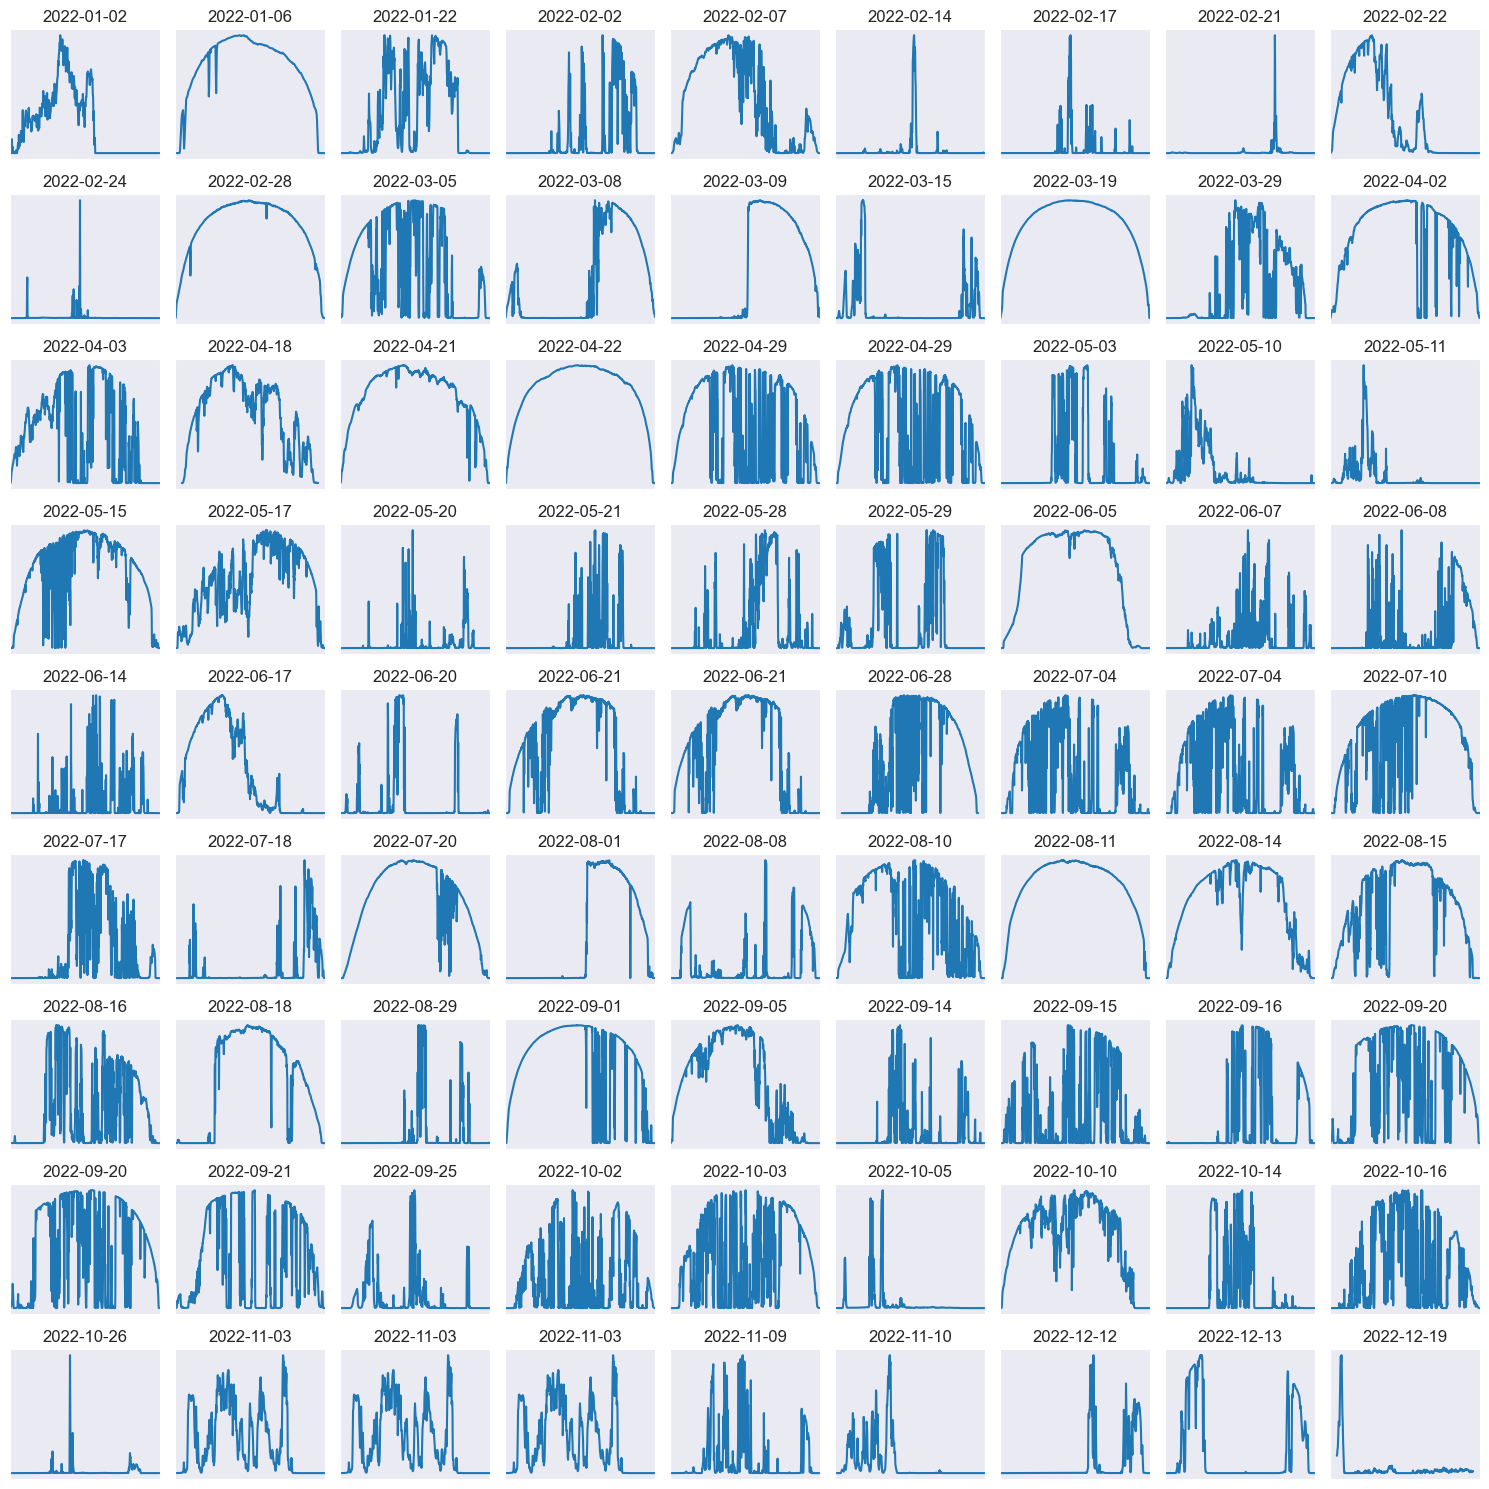

In [41]:
# Generate a large plot with subplots for random dates in the dataset
import random
df_tmp = df.loc['2022']
dates = random.sample(list(df_tmp.index), 81)
# sort the dates
dates = sorted(dates)
fig, axes = plt.subplots(9, 9, figsize=(15, 15))
for i, date in enumerate(dates):
    ax = axes[i // 9, i % 9]

    date_str = date.strftime('%Y-%m-%d')
    ax.set_title(f'{date_str}')
    df_tmp.loc[date_str, 'DNI'].plot(ax=ax)
    ax.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False,
               left=False, right=False, labelleft=False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.xaxis.label.set_visible(False)

plt.tight_layout()
plt.show()

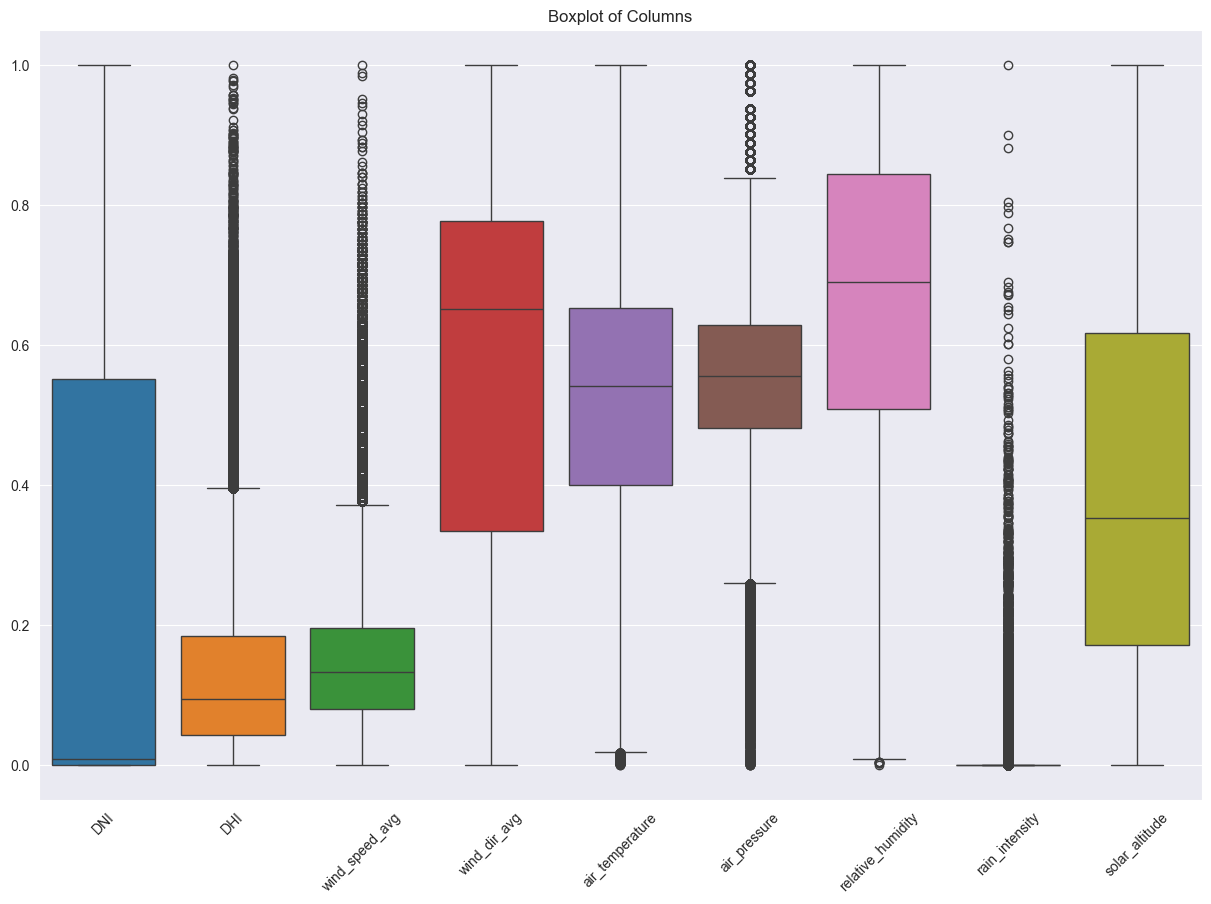

In [43]:
# boxplot of columns
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title('Boxplot of Columns')
plt.xticks(rotation=45)
plt.show()


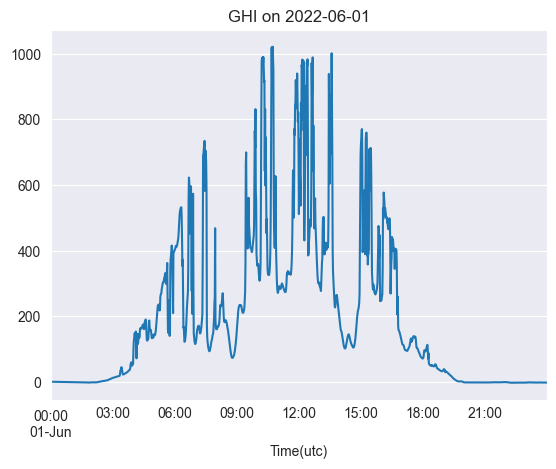

In [16]:
# select random date and plot the GHI
date = '2023-03-01'
df.loc[date, 'GHI'].plot()
plt.title(f'GHI on {date}')
plt.show()